Using TensorFlow backend.


(u'n02114367', u'timber_wolf', 0.74851)


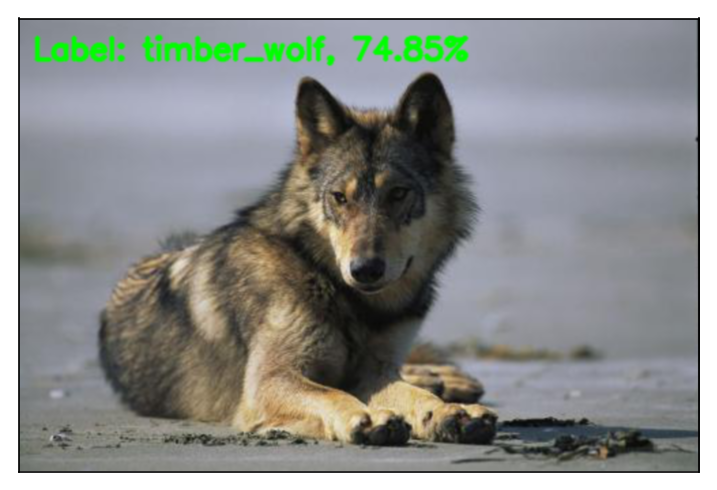

In [1]:
%matplotlib inline
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import cv2
from matplotlib import pyplot as plt

model = VGG16(weights='imagenet')

img_path = 'demo.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
preds = decode_predictions(features, top=1)[0][0]
print(preds)

# Label and show the image
img = cv2.imread('demo.jpg',cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
cv2.putText(img, "Label: {}, {:.2f}%".format(preds[1], preds[2] * 100), 
            (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,255,0), 2, cv2.LINE_AA)
plt.figure(dpi=150)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()